In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data1 = pd.read_csv('Walmart.csv')
data1.set_index('Date', inplace=True)
a= int(input("Enter the store id:"))
store = data1[data1.Store == a]
sales = pd.DataFrame(store.Weekly_Sales.groupby(store.index).sum())
sales.dtypes

Enter the store id: 22


Weekly_Sales    float64
dtype: object

In [3]:
sales.head(20)

,Weekly_Sales
Date,
01-04-2011,951588.37
01-06-2012,1102857.37
01-07-2011,1077491.68
01-10-2010,905987.17
02-03-2012,974866.65
02-04-2010,1177340.99
02-07-2010,1120259.71
02-09-2011,912762.76
02-12-2011,1167621.14


In [5]:
sales.reset_index(inplace = True)
sales['Date'] = pd.to_datetime(sales['Date'])
sales.set_index('Date',inplace = True)

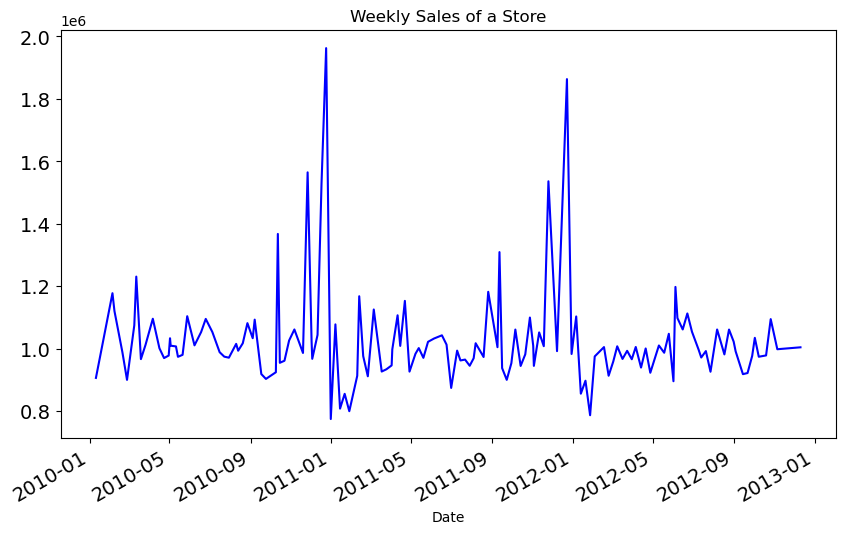

In [6]:
sales.Weekly_Sales.plot(figsize=(10,6), title= 'Weekly Sales of a Store', fontsize=14, color = 'blue')
plt.show()

<Figure size 640x480 with 0 Axes>

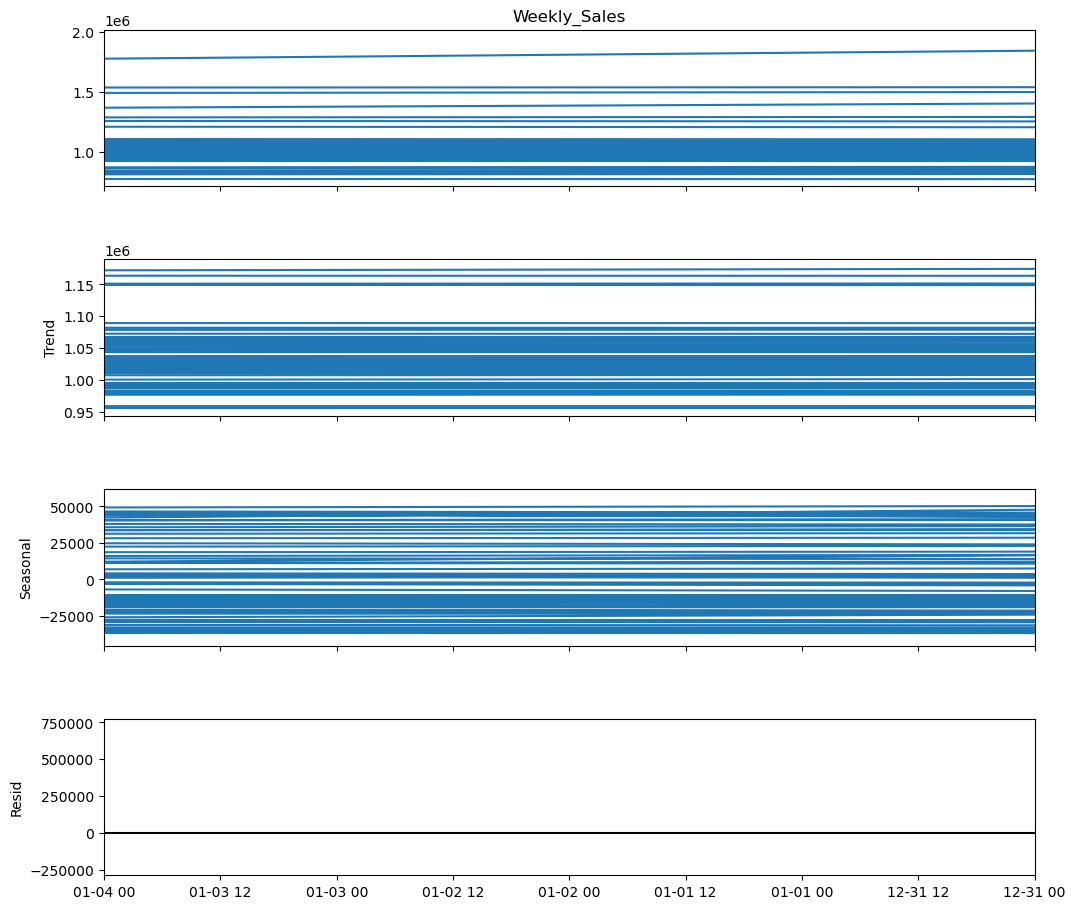

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(sales.Weekly_Sales, period=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(12, 10)
plt.show()

In [ ]:
store5 = data1[data1.Store == 5]

sales5 = pd.DataFrame(store5.Weekly_Sales.groupby(store5.index).sum())
sales5.dtypes

sales5.reset_index(inplace = True)

sales5['Date'] = pd.to_datetime(sales5['Date'])
sales5.set_index('Date',inplace = True)

In [10]:
y1=sales.Weekly_Sales
y2=sales5.Weekly_Sales

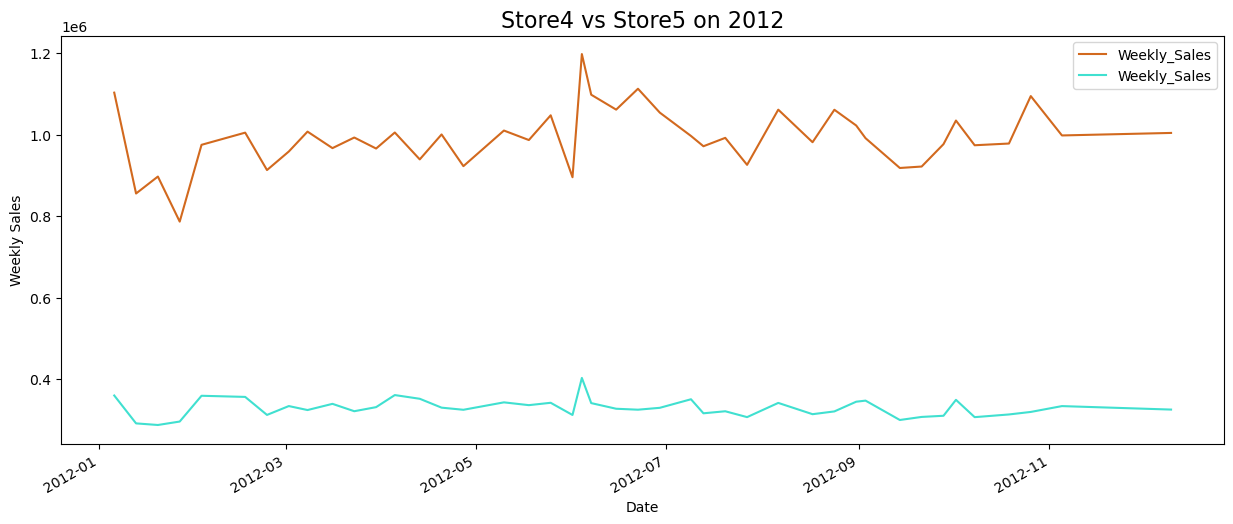

In [11]:
y1['2012'].plot(figsize=(15, 6),legend=True, color = 'chocolate')
y2['2012'].plot(figsize=(15, 6), legend=True, color = 'turquoise')
plt.ylabel('Weekly Sales')
plt.title('Store4 vs Store5 on 2012', fontsize = '16')
plt.show()

In [82]:
# Clearly we can see the irregularities 

In [12]:
p = d = q = range(0, 5)
import itertools
pdq = list(itertools.product(p, d, q))

seasonal_pdq = [(x[0], x[1], x[2], 52) for x in list(itertools.product(p, d, q))]

In [ ]:
import statsmodels.api as sm

mod = sm.tsa.statespace.SARIMAX(y1,
                                order=(4, 4, 3),
                                seasonal_order=(1, 1, 0, 52),   #enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

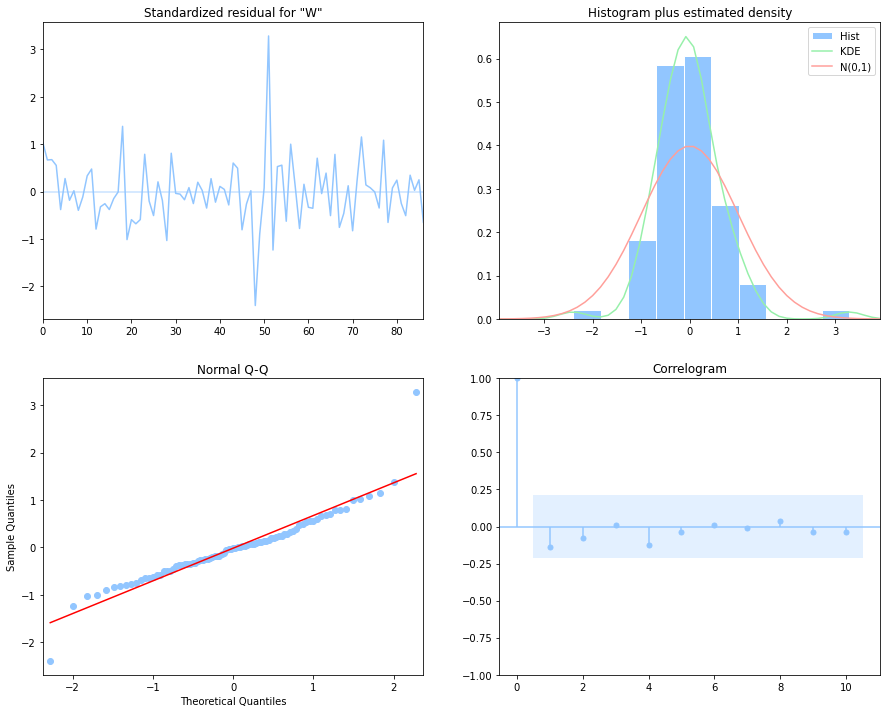

In [85]:
plt.style.use('seaborn-pastel')
results.plot_diagnostics(figsize=(15, 12))
plt.show()

In [86]:
pred = results.get_prediction(start=pd.to_datetime('2012-07-27'), dynamic=False)
pred_ci = pred.conf_int()

C:\Users\HP\AppData\Local\Temp\ipykernel_8504\2689329424.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed')


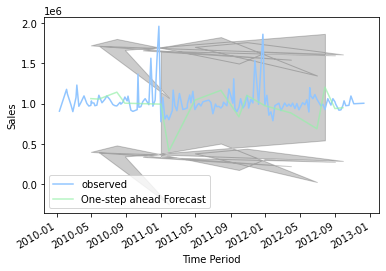

In [87]:
ax = y1['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')
plt.legend()

plt.show()

In [88]:
y_forecasted = pred.predicted_mean
y_truth = y1['2012-7-27':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 28636274043.18


In [89]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2012-7-27'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

C:\Users\HP\AppData\Local\Temp\ipykernel_8504\4127785946.py:1: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ax = y1['2010':].plot(label='observed', figsize=(12, 8))


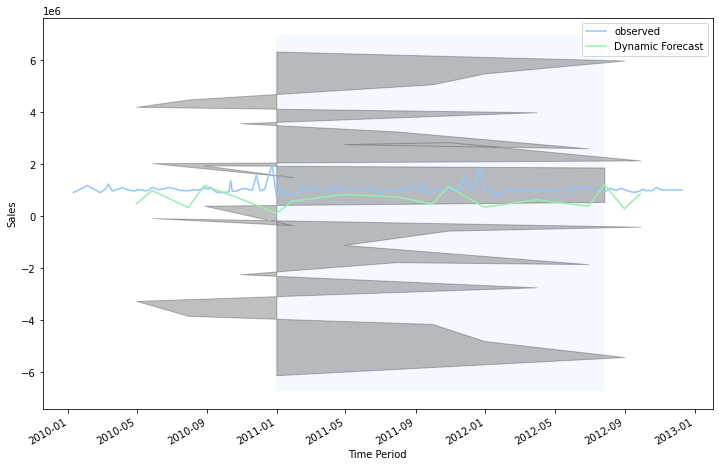

In [90]:


ax = y1['2010':].plot(label='observed', figsize=(12, 8))
pred_dynamic.predicted_mean.plot(label='Dynamic Forecast', ax=ax)

ax.fill_between(pred_dynamic_ci.index,
                pred_dynamic_ci.iloc[:, 0],
                pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)

ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2012-7-26'), y1.index[-1],
                 alpha=.1, zorder=-1)

ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()



In [91]:
import numpy as np
y_forecasted = pred_dynamic.predicted_mean
print(y_forecasted)

Date
2012-07-27    1.205017e+06
2010-08-27    1.174084e+06
2011-01-28    5.742142e+05
2010-05-28    9.777730e+05
2012-09-28    8.650936e+05
2011-10-28    1.139981e+06
2011-04-29    8.276909e+05
2012-06-29    3.782356e+05
2011-07-29    7.410754e+05
2010-10-29    6.647317e+05
2012-03-30    6.252202e+05
2010-04-30    4.688193e+05
2010-07-30    3.216021e+05
2011-09-30    4.587662e+05
2011-12-30    3.399325e+05
2012-08-31    2.798574e+05
2010-12-31    1.031730e+05
Name: predicted_mean, dtype: float64


In [92]:
y_truth = y1['2012-7-27':]

print(y_truth)

Date
2012-08-06    1061134.37
2012-09-03     991127.01
2012-10-02    1034448.07
2012-10-08     973812.79
2012-11-05     997868.63
2012-12-10    1004039.84
2012-09-14     918049.28
2012-08-17     981273.26
2012-10-19     978027.95
2012-09-21     921612.53
2012-08-24    1060906.75
2012-10-26    1094422.69
2012-07-27     925731.21
2012-09-28     976479.51
2012-08-31    1022270.86
Name: Weekly_Sales, dtype: float64


In [93]:
rmse = np.sqrt(((y_forecasted - y_truth) ** 2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(rmse, 2)))

The Root Mean Squared Error of our forecasts is 462451.92


In [94]:
Residual= y_forecasted - y_truth
print("Residual for Store1",np.abs(Residual).sum())

Residual for Store1 1133085.4740104112


In [ ]:
pred_uc = results.get_forecast(steps=12)

print(pred_uc)

In [96]:
pred_ci = pred_uc.conf_int()

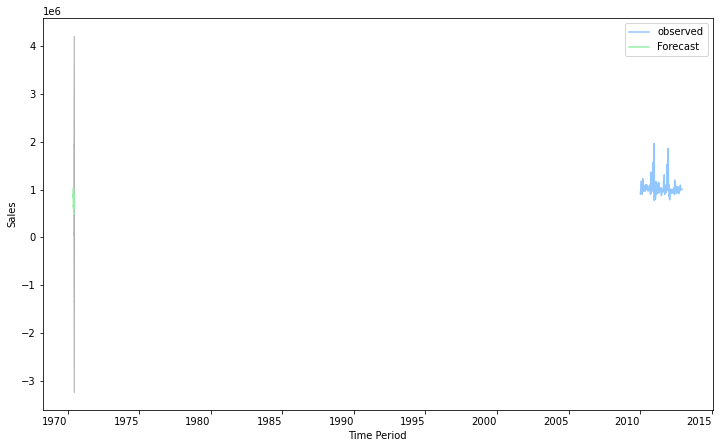

In [97]:


ax = y1.plot(label='observed', figsize=(12, 8))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Time Period')
ax.set_ylabel('Sales')

plt.legend()
plt.show()

